## Plot analysis

- 15% / (616 - 29) px = 0.025 % / px
- My annotated points are systematically off by -1 pixel on negative values and +1 pixel on positive values (due to bar boundaries).

In [1]:
from pathlib import Path
import typing as t

In [9]:
import numpy as np

In [2]:
def parse_wpd_data(path) -> t.List[float]:
    return [float(x.split(',')[1]) for x in Path(path).read_text().splitlines()[2:]]

In [18]:
control_raw_data = parse_wpd_data('wpd_datasets-control.csv')

In [19]:
tre_raw_data = parse_wpd_data('wpd_datasets-TRE.csv')

In [20]:
tre_data = np.array(tre_raw_data[1:]) - tre_raw_data[0]
control_data = np.array(control_raw_data[1:]) - control_raw_data[0]

Mean of TRE group (-1.17% in paper):

In [21]:
np.mean(tre_data)

-1.0041551246537401

Mean of control group (-0.75% in paper):

In [22]:
np.mean(control_data)

-0.704249683289185

### Recalculating the frequentist confidence interval in the paper

In [25]:
from scipy.stats import ttest_1samp

In [27]:
ttest_1samp(control_data, 0)

Ttest_1sampResult(statistic=-2.0031319526095492, pvalue=0.05001202022350125)

In [28]:
ttest_1samp(tre_data, 0)

Ttest_1sampResult(statistic=-3.9113657465233644, pvalue=0.0002505865943389741)

### Fitting a t-distribution on the data instead

In [29]:
import best

In [34]:
best_out = best.analyze_two(tre_data, control_data)

/home/laszlo/.local/lib/python3.8/site-packages/best/model.py:77: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples, **kwargs)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Group 2 log sigma, Group 1 log sigma, nu - 2.5, Group 2 mean, Group 1 mean]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 7 seconds.


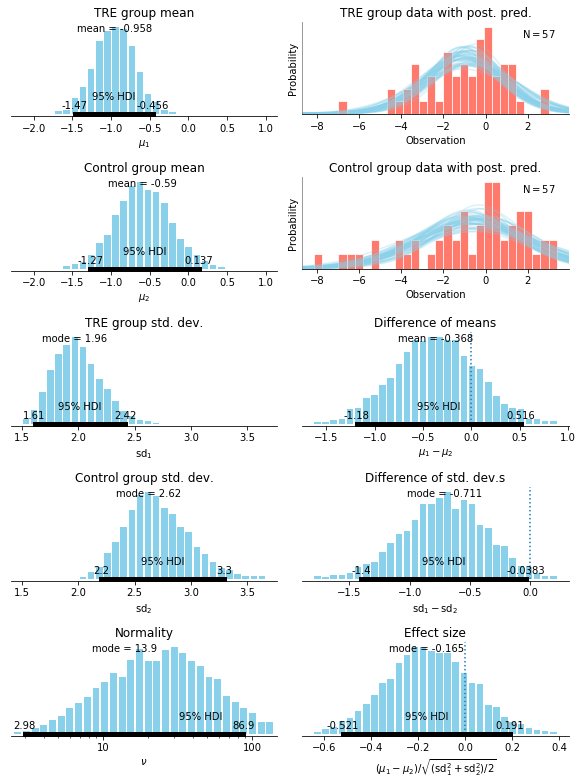

In [36]:
fig = best.plot_all_two(best_out, group1_name='TRE group', group2_name='Control group')

An important quality of the pos-terior 95 % HDI is that it really does indicate the 95 %most probable values of the parameter, given the data. Theposterior distribution depends only on the actually observeddata (and the prior), and does not depend on the stoppingor testing intentions of the analyst. The frequentist CI isoften misinterpreted as if it were a posterior distribution,because what analysts intuitively want from their analysis isthe Bayesian posterior distribution, as we discuss more later.The posterior 95 % HDI refers explicitly to an actualprobability distribution over the parameter values, such thatparameter values in the middle of the HDI tend to havehigher credibility than parameter values at the limits of theHDI. The posterior distribution shows the exact shape ofthe distribution. A frequentist CI, on the other hand, doesnot refer to a probability distribution over parameter valuesand carries no distributional information, as was discussedearlier in the article

ROPE: region of practical equivalence

 If the 95 % HDI falls entirely outside the ROPE then we decide to reject theROPE’d value (not the entire ROPE’d interval), and if the95 % HDI falls entirely inside the ROPE then we decideto accept the ROPE’d value for practical purposes, andotherwise we remain undecided.

“[NHST] doesnot tell us what we want to know, and we so much want toknow what we want to know that, out of desperation, wenevertheless believe that it does!"

In [ ]:
Effects of Time-Restricted Eating on Weight Loss

overweight and obese people BME 27-